## **Before answering the questions, I perform an EDA.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
sns.set()

In [4]:
df_food = pd.read_csv('nutrition.csv')
df_food.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg


In [5]:
# Database size
df_food.shape

(7793, 12)

In [6]:
# Number of columns, names and type
for index, (i, column_type) in enumerate(zip(df_food.columns, df_food.dtypes), start=1):
    print(f"{index}. column: {i} -- type: {column_type}")

1. column: FDC_ID -- type: int64
2. column: Item -- type: object
3. column: Category -- type: object
4. column: Calories -- type: object
5. column: Protein -- type: object
6. column: Carbohydrate -- type: object
7. column: Total fat -- type: object
8. column: Cholesterol -- type: object
9. column: Fiber -- type: object
10. column: Water -- type: object
11. column: Alcohol -- type: object
12. column: Vitamin C -- type: object


Here, you can see that the columns corresponding to calories, macros, and other numerical characteristics of foods have units of measurements. For this reason, the data type is object.

It's a good practice to store only the numbers and instead of units along with the data in the database.

In [7]:
# list of columns to change
columns_with_units = ["Calories", "Protein", "Carbohydrate", "Total fat", "Cholesterol", "Fiber", "Water", "Alcohol", "Vitamin C"]

# Function to drop units
def drop_units(value):
    if isinstance(value, str):  # Check if value is a string
        if "kcal" in value:
            return float(value.split()[0].rstrip("kcal"))
        elif "g" in value:
            return float(value.split()[0].rstrip("g"))
        elif "mg" in value:
            return float(value.split()[0].rstrip("mg"))
    return None

# Iterate over each column
for column in columns_with_units:
    df_food[column] = df_food[column].apply(drop_units)
        
# Show database
df_food.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88,41.18,13.24,0.0,1.2,35.50,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34,53.42,11.27,0.0,1.4,27.86,NaN,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.10,79.80,3.70,NaN,NaN,3.20,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.00,46.00,1.80,NaN,NaN,42.60,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0


In [8]:
# Check null values

null_values = df_food.isnull().sum()
print("Columns with null values: \n", null_values[null_values > 0])

Columns with null values: 
 Cholesterol     399
Fiber           562
Alcohol        2394
Vitamin C       461
dtype: int64


In [9]:
# Replace null values with 0 instead of deleting rows to avoid losing data
df_food_nutrition = df_food.fillna(0)
df_food_nutrition.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88,41.18,13.24,0.0,1.2,35.50,0.0,0.0
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34,53.42,11.27,0.0,1.4,27.86,0.0,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.10,79.80,3.70,0.0,0.0,3.20,0.0,0.0
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.00,46.00,1.80,0.0,0.0,42.60,0.0,0.0
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0


In [10]:
# Averages food

df_food_nutrition.mean()

C:\Users\mroja\AppData\Local\Temp/ipykernel_3212/2027743720.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_food_nutrition.mean()


FDC_ID          171408.000000
Calories           220.243118
Protein             11.926873
Carbohydrate        19.569788
Total fat           10.687361
Cholesterol         42.738997
Fiber                1.836392
Water               56.033466
Alcohol              0.127679
Vitamin C            8.444604
dtype: float64

## 💡 Which fruit has the highest vitamin C content? What are some other sources of vitamin C?

In [11]:
# Here, I can see all categories of foods in the database
categories_food = df_food_nutrition["Category"].unique()

In [12]:
print(categories_food)

['Baked Products' 'Snacks' 'Sweets' 'Vegetables and Vegetable Products'
 'American Indian/Alaska Native Foods' 'Restaurant Foods' 'Beverages'
 'Fats and Oils' 'Sausages and Luncheon Meats' 'Dairy and Egg Products'
 'Baby Foods' 'Poultry Products' 'Pork Products' 'Breakfast Cereals'
 'Legumes and Legume Products' 'Finfish and Shellfish Products'
 'Fruits and Fruit Juices' 'Cereal Grains and Pasta'
 'Nut and Seed Products' 'Beef Products' 'Meals, Entrees, and Side Dishes'
 'Fast Foods' 'Spices and Herbs' 'Soups, Sauces, and Gravies'
 'Lamb, Veal, and Game Products']


In [15]:
#Filter the data by "Fruits"
fruits = df_food_nutrition[df_food_nutrition["Category"].str.contains("Fruits")]

# Sort the filtered data
fruits_vit_c = fruits[["FDC_ID", "Item", "Category", "Vitamin C"]].sort_values(by = "Vitamin C", ascending = False)

In [17]:
fruits_vit_c

,FDC_ID,Item,Category,Vitamin C
5220,171686,"Acerola, (west indian cherry), raw",Fruits and Fruit Juices,1677.6
5221,171687,"Acerola juice, raw",Fruits and Fruit Juices,1600.0
5285,173044,"Guavas, common, raw",Fruits and Fruit Juices,228.3
5059,168152,"Jujube, Chinese, fresh, dried",Fruits and Fruit Juices,217.6
5126,169087,"Litchis, dried",Fruits and Fruit Juices,183.0
...,...,...,...,...
5068,168161,"Prunes, dehydrated (low-moisture), stewed",Fruits and Fruit Juices,0.0
5067,168160,"Prunes, dehydrated (low-moisture), uncooked",Fruits and Fruit Juices,0.0
5098,168191,"Dates, medjool",Fruits and Fruit Juices,0.0
5135,169096,"Olives, pickled, canned or bottled, green",Fruits and Fruit Juices,0.0


In [18]:
# Other sources of Vitamin C
all_food_vit_c = df_food_nutrition[["FDC_ID", "Item", "Category", "Vitamin C"]]

all_food_vit_c.sort_values(by = "Vitamin C", ascending = False)

,FDC_ID,Item,Category,Vitamin C
3449,173487,"Babyfood, GERBER, 2nd Foods, apple, carrot and...",Baby Foods,2732.0
2140,167707,"Beverages, fruit-flavored drink, powder, with ...",Beverages,2400.0
2316,173237,"Beverages, Orange-flavor drink, breakfast type...",Beverages,2400.0
1454,169373,"Peppers, sweet, red, freeze-dried",Vegetables and Vegetable Products,1900.0
5220,171686,"Acerola, (west indian cherry), raw",Fruits and Fruit Juices,1677.6
...,...,...,...,...
3766,172831,"Ruffed Grouse, breast meat, skinless, raw",Poultry Products,0.0
3765,172830,"Chicken, broiler, rotisserie, BBQ, wing, meat ...",Poultry Products,0.0
3758,172414,"Goose, domesticated, meat only, cooked, roasted",Poultry Products,0.0
3756,172412,"Goose, domesticated, meat and skin, cooked, ro...",Poultry Products,0.0


As we can see in the query, the fruit with most vitamin C is Acerola.

![image2](image2.jpeg)


## 💡 Describe the relationship between the calories and water content of a food item.

In [19]:
# Calculate the Pearson correlation coefficient
coef_corr = df_food_nutrition["Water"].corr(df_food_nutrition["Calories"])
print(f"The Pearson correlation coefficient is: {coef_corr}")

The Pearson correlation coefficient is: -0.8954571656706265


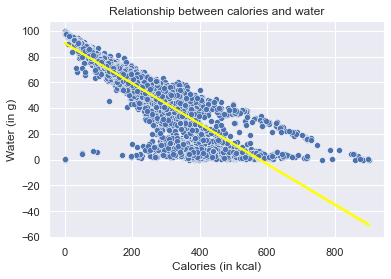

In [20]:
# Scatter plot
sns.scatterplot(x='Calories', y='Water', data=df_food_nutrition)

# Add the linear regression line
sns.regplot(x='Calories', y='Water', data=df_food_nutrition, scatter=False, color='yellow')

# Add title and labels
plt.xlabel('Calories (in kcal)')
plt.ylabel('Water (in g)')
plt.title('Relationship between calories and water')

# Show the plot
plt.show()

According to the Pearson correlation coeficient (-0.895) and the scatter plot, the relationship between calories and water is **negative**. It means that when a food has more content of water, the content of calories is lower and it happens because water is thermodynamically very stable.

![image3](image3.png)


## 💡 What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?

### 1️⃣ Zero-carb diet: 

In [21]:
zero_carb = df_food_nutrition[df_food_nutrition["Carbohydrate"] == 0]

zero_carb

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
472,175040,"Leavening agents, baking soda",Baked Products,0.0,0.00,0.0,0.00,0.0,0.0,0.20,0.0,0.0
551,167961,"Snacks, pork skins, plain",Snacks,544.0,61.30,0.0,31.30,95.0,0.0,1.80,0.0,0.5
910,169599,"Gelatins, dry powder, unsweetened",Sweets,335.0,85.60,0.0,0.10,0.0,0.0,13.00,0.0,0.0
1865,167607,"Moose, meat, raw (Alaska Native)",American Indian/Alaska Native Foods,103.0,22.30,0.0,1.50,54.0,0.0,74.79,0.0,4.0
1868,167610,"Seal, bearded (Oogruk), meat, raw (Alaska Native)",American Indian/Alaska Native Foods,110.0,26.70,0.0,0.40,100.0,0.0,69.60,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7788,175300,"Game meat, buffalo, water, cooked, roasted","Lamb, Veal, and Game Products",131.0,26.83,0.0,1.80,61.0,0.0,68.81,0.0,0.0
7789,175301,"Game meat, elk, raw","Lamb, Veal, and Game Products",111.0,22.95,0.0,1.45,55.0,0.0,74.38,0.0,0.0
7790,175302,"Game meat, elk, cooked, roasted","Lamb, Veal, and Game Products",146.0,30.19,0.0,1.90,73.0,0.0,66.28,0.0,0.0
7791,175303,"Game meat, goat, raw","Lamb, Veal, and Game Products",109.0,20.60,0.0,2.31,57.0,0.0,75.84,0.0,0.0


In [22]:
zero_carb.shape

(2138, 12)

In [23]:
categories_zero_carb = zero_carb["Category"].unique()

print(categories_zero_carb)

['Baked Products' 'Snacks' 'Sweets' 'American Indian/Alaska Native Foods'
 'Restaurant Foods' 'Beverages' 'Fats and Oils'
 'Sausages and Luncheon Meats' 'Dairy and Egg Products' 'Baby Foods'
 'Poultry Products' 'Pork Products' 'Legumes and Legume Products'
 'Finfish and Shellfish Products' 'Beef Products' 'Fast Foods'
 'Spices and Herbs' 'Soups, Sauces, and Gravies'
 'Lamb, Veal, and Game Products']


In [24]:
# Categories of food excluded in a zero-carb diet

categories_zero_excl = [category for category in categories_food if category not in categories_zero_carb]

print(categories_zero_excl)

['Vegetables and Vegetable Products', 'Breakfast Cereals', 'Fruits and Fruit Juices', 'Cereal Grains and Pasta', 'Nut and Seed Products', 'Meals, Entrees, and Side Dishes']


In [25]:
# Columns to average
col_to_avg_carb = zero_carb[["Calories", "Protein", "Total fat", "Cholesterol", "Fiber", "Water", "Alcohol", "Vitamin C"]]

# Averages of zero-carb diet
avg_zero_carb = col_to_avg_carb.mean()

print(avg_zero_carb)

Calories       233.555012
Protein         22.289935
Total fat       15.582214
Cholesterol     93.452760
Fiber            0.000000
Water           61.081712
Alcohol          0.105613
Vitamin C        0.669411
dtype: float64


### 2️⃣ High-protein diet:

In Europe, a high protein diet is one in which proteins provide at least 20% of the food.
For that reason, I will create a new column that sets the protein threshold for each food and then compare the threshold for each food with the protein content each food provides. 

When the protein content of the food is equal to or greater than the threshold established for each food, it will be considered high in protein.

**EU regulation**: https://www.boe.es/buscar/doc.php?id=DOUE-L-2006-82775

In [26]:
df_food_nutrition["protein threshold"] = df_food_nutrition["Calories"] * 0.20 / 4

In [27]:
# Create a new dataframe for high-protein diet
high_protein = pd.DataFrame(columns=df_food_nutrition.columns)

# Compare "Calories" and "protein threshold" columns and store results in "high_protein" dataset
for index, row in df_food_nutrition.iterrows():
    if row["Protein"] > row["protein threshold"]:
        high_protein = high_protein.append(row, ignore_index=True)

In [28]:
high_protein = high_protein.sort_values(by="Protein", ascending=False)

high_protein

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C,protein threshold
1768,174302,"Soy protein isolate, potassium type",Legumes and Legume Products,321.0,88.32,2.59,0.53,0.0,0.0,4.98,0.0,0.0,16.05
1746,174276,Soy protein isolate,Legumes and Legume Products,335.0,88.32,0.00,3.39,0.0,0.0,4.98,0.0,0.0,16.75
24,169599,"Gelatins, dry powder, unsweetened",Sweets,335.0,85.60,0.00,0.10,0.0,0.0,13.00,0.0,0.0,16.75
763,170895,"Egg, white, dried, stabilized, glucose reduced",Dairy and Egg Products,357.0,84.08,4.51,0.32,0.0,0.0,5.48,0.0,0.0,17.85
473,168020,"Seal, bearded (Oogruk), meat, dried (Alaska Na...",American Indian/Alaska Native Foods,351.0,82.60,0.00,2.30,0.0,0.0,11.60,0.0,0.0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,175099,"Beverages, carbonated, low calorie, cola or pe...",Beverages,2.0,0.11,0.29,0.03,0.0,0.0,99.54,0.0,0.0,0.10
582,171889,"Beverages, coffee, brewed, prepared with tap w...",Beverages,0.0,0.10,0.00,0.00,0.0,0.0,99.30,0.0,0.0,0.00
597,173204,"Beverages, carbonated, low calorie, other than...",Beverages,0.0,0.10,0.00,0.00,0.0,0.0,99.80,0.0,0.0,0.00
598,173207,"Beverages, carbonated, low calorie, other than...",Beverages,0.0,0.10,0.00,0.00,0.0,0.0,99.80,0.0,0.0,0.00


In [29]:
high_protein.shape

(3745, 13)

In [30]:
categories_high_protein = high_protein["Category"].unique()

print(categories_high_protein)

['Legumes and Legume Products' 'Sweets' 'Dairy and Egg Products'
 'American Indian/Alaska Native Foods' 'Beverages'
 'Cereal Grains and Pasta' 'Finfish and Shellfish Products' 'Snacks'
 'Vegetables and Vegetable Products' 'Nut and Seed Products'
 'Baked Products' 'Pork Products' 'Lamb, Veal, and Game Products'
 'Beef Products' 'Poultry Products' 'Restaurant Foods' 'Breakfast Cereals'
 'Sausages and Luncheon Meats' 'Fast Foods' 'Spices and Herbs'
 'Baby Foods' 'Meals, Entrees, and Side Dishes'
 'Soups, Sauces, and Gravies' 'Fats and Oils']


In [31]:
categories_high_protein_excl = [category for category in categories_high_protein if category not in categories_food] 

In [32]:
categories_high_protein_excl

[]

In [33]:
# Columns to average
col_to_avg_protein = high_protein[["Calories", "Protein", "Total fat", "Cholesterol", "Fiber", "Water", "Alcohol", "Vitamin C"]]

# Averages of high-protein diet
avg_high_protein = col_to_avg_protein.mean()

print(avg_high_protein)

Calories       171.761713
Protein         19.408016
Total fat        8.224538
Cholesterol     75.819493
Fiber            0.996048
Water           66.024315
Alcohol          0.000000
Vitamin C        5.192016
dtype: float64


## 💡 According to the Cleveland Clinic website, a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.

In [34]:
# Calculate the expected calorie content based on estimates
df_food_nutrition["expected_calories"] = 4 * df_food_nutrition["Protein"] + 4 * df_food_nutrition["Carbohydrate"] + df_food_nutrition["Total fat"]

# Fit the lineal model
X = df_food_nutrition[["Protein", "Carbohydrate", "Total fat"]]
y = df_food_nutrition["Calories"]

model = LinearRegression()
results = model.fit(X, y)

# Predict calorie values using the fitted model
y_pred = model.predict(X)

# Model coefficients
print("Model coefficients:")
print(f"- Protein: {round(model.coef_[0], 2)}")
print(f"- Carbohydrate: {round(model.coef_[1], 2)}")
print(f"- Fat: {round(model.coef_[2], 2)}\n")

# Rounded model coefficients
print("Rounded model coefficients:")
print(f"- Protein: {round(model.coef_[0])}")
print(f"- Carbohydrate: {round(model.coef_[1])}")
print(f"- Fat: {round(model.coef_[2])}")

Model coefficients:
- Protein: 4.0
- Carbohydrate: 3.8
- Fat: 8.8

Rounded model coefficients:
- Protein: 4
- Carbohydrate: 4
- Fat: 9


## 💡 Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

In [35]:
# Calculate the mean square error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae}\n")

# Calculate model residuals
residuals = y - y_pred

# Identify observations with the largest residuals
outlier_observations = df_food_nutrition.loc[np.abs(residuals) > 2 * np.sqrt(mse)]

print("Number of observations with the largest residuals:", outlier_observations['FDC_ID'].nunique())
print("Observations with the largest residuals:")

outlier_observations[["Item", "Category", "Calories", "Protein", "Carbohydrate", "Total fat"]]

Mean Squared Error (MSE): 291.7522292268119
Mean Absolute Error (MAE): 7.569804496327667

Number of observations with the largest residuals: 192
Observations with the largest residuals:


,Item,Category,Calories,Protein,Carbohydrate,Total fat
248,"Leavening agents, baking powder, double-acting...",Baked Products,53.0,0.00,27.70,0.00
249,"Leavening agents, baking powder, double-acting...",Baked Products,51.0,0.10,24.10,0.00
250,"Leavening agents, baking powder, low-sodium",Baked Products,97.0,0.10,46.90,0.40
475,"Leavening agents, yeast, baker's, active dry",Baked Products,325.0,40.44,41.22,7.61
578,"Tortilla chips, low fat, baked without fat",Snacks,448.0,11.00,80.20,5.70
...,...,...,...,...,...,...
7052,"Spices, rosemary, dried",Spices and Herbs,331.0,4.88,64.06,15.22
7057,"Vanilla extract, imitation, alcohol",Spices and Herbs,237.0,0.05,2.41,0.00
7061,"Spearmint, dried",Spices and Herbs,285.0,19.93,52.04,6.03
7065,"Seasoning mix, dry, taco, original",Spices and Herbs,322.0,4.50,58.00,0.00


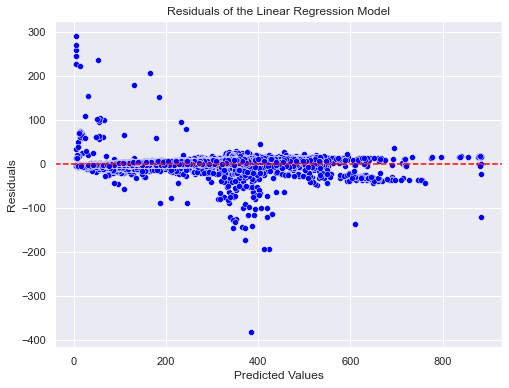

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of the Linear Regression Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()